In [1020]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn import preprocessing




In [1021]:
df = pd.read_csv ('StudentSurveyData.csv')
df = df.drop (columns='Timestamp') #Drop column (1) with the 'name'
df = df.drop(columns= 'Username')
df = df.drop(columns= 'Unnamed: 55')
df = df.drop(columns= 'Unnamed: 56')
df.fillna('NIL', inplace = True)

df.to_csv("CleanDataSet.csv")
ResearchData = pd.DataFrame(df)


ResearchData.head(15)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
0,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Moderately stressful,Sometimes,Yes,Somewhat concerned,NIL,Somtimes
1,Female,23-26,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Moderate,Good,Moderately stressful,Never,No,Not at all concerned,NIL,No
2,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Rarely,Yes,Somewhat concerned,Moderately concerned,Somtimes
3,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Sometimes,Sometimes because of limited hours,Somewhat concerned,Extremely concerned,Yes
4,Male,30-34,Graduate Degree,Domestic,Part time,Year 6,Other,Other,"I'm sorry, is this survey for Canadians only? ...",Yes,...,Course load was comparable to in-person,Everytime,Easy,Excellent,Not at all stressful,Never,NIL,Not at all concerned,Not at all concerned,No
5,Non-binary,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Arts,Other,Nottingham Trent University - Outside of Canada,Yes,...,No,Occasionally,Easy,Poor,Moderately stressful,Often,NIL,Extremely concerned,Extremely concerned,No
6,Female,18-22,Graduate Degree,Domestic,Full time,Year 1,Other,Other,Nottingham trent university,Yes,...,Yes,Occasionally,Difficult,Good,Moderately stressful,Sometimes,Yes,Extremely concerned,Moderately concerned,Somtimes
7,Female,18-22,Undergraduate Degree,International Student,Full time,Year 3,Bachelor of Science,University of Toronto,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Easy,Good,Moderately stressful,Rarely,Yes,Somewhat concerned,Not at all concerned,Somtimes
8,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Commerce,McMaster University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Easy,Good,Similar to in-person learning,Sometimes,Yes,Somewhat concerned,Not at all concerned,Yes
9,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 2,Other,University of Waterloo,Bachelor of mathematics,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Good,Moderately stressful,Often,No,Extremely concerned,Extremely concerned,Somtimes


In [1022]:
ResearchData['What is your gender?'].value_counts()

Male                   25
Female                 18
Non-binary              5
Transgender             1
I prefer not to say     1
Name: What is your gender?, dtype: int64

In [1023]:
Gender = pd.DataFrame(ResearchData['What is your gender?'].value_counts()).reset_index()
Gender['Percentage'] = Gender['What is your gender?'] / df['What is your gender?'].value_counts().sum() 
Gender.rename(columns= {'index': 'Gender', 'What is your gender?' : 'Total'}, inplace=True)

Gender

,Gender,Total,Percentage
0,Male,25,0.50
1,Female,18,0.36
2,Non-binary,5,0.10
3,Transgender,1,0.02
4,I prefer not to say,1,0.02


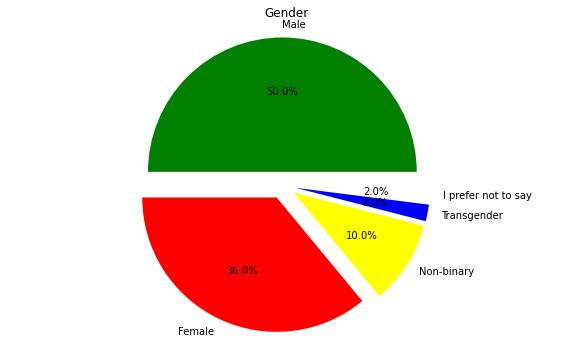

In [1024]:
# Customize Color
colors = ['Green', 'Red', 'Yellow', 'Blue', 'White']
explode = (0.1, 0.1, 0.1, 0.1, 0.1) 

# Create a pie chart
plt.pie(Gender['Total'], explode = explode, labels = Gender['Gender'], colors = colors, autopct = '%1.1f%%', shadow = False, startangle = 0)

# Add title
plt.title('Gender')
plt.axis('equal')

#Display Pie Chart
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

In [1025]:
#Converting Data to numerical value

ResearchDataCopy = ResearchData.copy()

le = preprocessing.LabelEncoder()

ResearchDataCopy = ResearchDataCopy.apply(le.fit_transform)
ResearchDataCopy.head(10)


,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
0,2,2,1,0,0,3,2,2,6,1,...,3,3,0,1,1,5,3,3,2,2
1,0,1,1,0,0,3,3,2,6,1,...,0,0,2,2,1,2,1,2,2,1
2,2,2,1,0,0,3,2,2,6,1,...,3,3,0,4,0,4,3,3,1,2
3,2,0,1,0,0,3,2,2,6,1,...,3,3,0,4,0,5,2,3,0,3
4,2,3,0,0,1,5,4,3,3,1,...,0,0,1,0,3,2,0,2,3,1
5,3,0,1,0,0,2,0,3,7,1,...,2,3,1,4,1,3,0,0,0,1
6,0,0,0,0,0,0,4,3,8,1,...,3,3,0,2,1,5,3,0,1,2
7,0,0,1,1,0,2,3,5,6,1,...,0,3,1,2,1,4,3,3,3,2
8,0,0,1,0,0,2,1,1,6,1,...,0,0,1,2,4,5,3,3,3,3
9,0,0,1,0,0,1,4,6,1,1,...,0,3,0,2,1,3,1,0,0,2


In [1026]:
Analysis1 = pd.DataFrame(ResearchData, columns=['Did you suffer from anxiety or depression during the pandemic?', 'Was online learning more stressful than in-person learning?'])
Analysis1.head(10)


,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
0,Sometimes,Moderately stressful
1,Never,Moderately stressful
2,Rarely,Extremely stressful
3,Sometimes,Extremely stressful
4,Never,Not at all stressful
5,Often,Moderately stressful
6,Sometimes,Moderately stressful
7,Rarely,Moderately stressful
8,Sometimes,Similar to in-person learning
9,Often,Moderately stressful


In [1027]:
Analysis1Copy = Analysis1.copy()

le = preprocessing.LabelEncoder()

Analysis1Copy = Analysis1Copy.apply(le.fit_transform)
Analysis1Copy.head(10)


,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
0,5,1
1,2,1
2,4,0
3,5,0
4,2,3
5,3,1
6,5,1
7,4,1
8,5,4
9,3,1


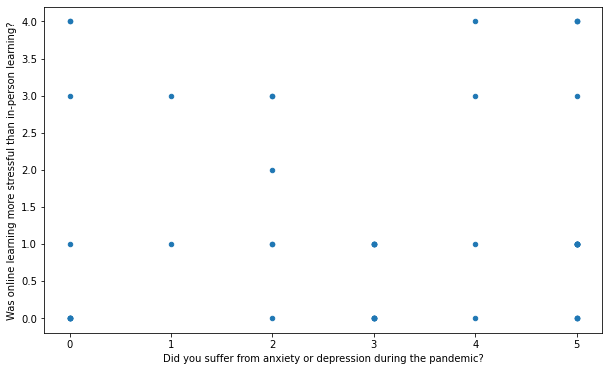

In [1028]:
Analysis1Copy.plot.scatter(x = 'Did you suffer from anxiety or depression during the pandemic?', y = 'Was online learning more stressful than in-person learning?')
plt.show()

In [1029]:
# Building the model with 5 clusters 
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
clusters = kmode.fit_predict(Analysis1)

Analysis1.insert(0, "Cluster", clusters, True)

temp = Analysis1.groupby('Cluster')
temp.count()


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 29.0


,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
Cluster,,
0,23,23
1,15,15
2,4,4
3,3,3
4,5,5


In [1030]:
Analysis1[Analysis1['Cluster']== 0].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
0,0,Sometimes,Moderately stressful
1,0,Never,Moderately stressful
4,0,Never,Not at all stressful
6,0,Sometimes,Moderately stressful
7,0,Rarely,Moderately stressful
8,0,Sometimes,Similar to in-person learning
12,0,Never,NIL
17,0,Sometimes,Moderately stressful
18,0,Sometimes,Moderately stressful
21,0,Sometimes,Moderately stressful


In [1031]:
Analysis1[Analysis1['Cluster']== 1].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
2,1,Rarely,Extremely stressful
11,1,Never,Extremely stressful
13,1,Often,Extremely stressful
14,1,Always,Extremely stressful
19,1,Always,Extremely stressful
22,1,Often,Extremely stressful
24,1,Often,Extremely stressful
27,1,Often,Extremely stressful
28,1,Often,Extremely stressful
34,1,Always,Not at all stressful


In [1032]:
Analysis1[Analysis1['Cluster']== 2].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
3,2,Sometimes,Extremely stressful
15,2,Sometimes,Extremely stressful
23,2,Sometimes,Extremely stressful
41,2,Sometimes,Extremely stressful


In [1033]:
Analysis1[Analysis1['Cluster']== 3].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
10,3,Always,Similar to in-person learning
44,3,Rarely,Similar to in-person learning
46,3,Always,Similar to in-person learning


In [1034]:
Analysis1[Analysis1['Cluster']== 4].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
5,4,Often,Moderately stressful
9,4,Often,Moderately stressful
16,4,Often,Moderately stressful
20,4,Often,Moderately stressful
47,4,Often,Moderately stressful


In [1035]:
Analysis1[Analysis1['Cluster']== 5].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?


In [1036]:
Analysis1[Analysis1['Cluster']== 6].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?


In [1037]:
Analysis1[Analysis1['Cluster']== 7].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?


In [1038]:
Analysis2 = pd.DataFrame(ResearchData, columns=['Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?', 'Did you feel your grade were lower compared to in-person learning?'])
Analysis2.head(10)

,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
0,Too strict,Grades were similar to in-person learning
1,Similar to in-person,Yes
2,Too strict,Yes
3,Too strict,No
4,Similar to in-person,Grades were similar to in-person learning
5,Similar to in-person,No
6,Similar to in-person,Yes
7,Similar to in-person,Grades were similar to in-person learning
8,Similar to in-person,Grades were similar to in-person learning
9,Too Lenient,Yes


In [1039]:
Analysis2Copy = Analysis2.copy()
le = preprocessing.LabelEncoder()

Analysis2Copy = Analysis2Copy.apply(le.fit_transform)
Analysis2Copy.head(10)

,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
0,3,0
1,1,3
2,3,3
3,3,2
4,1,0
5,1,2
6,1,3
7,1,0
8,1,0
9,2,3


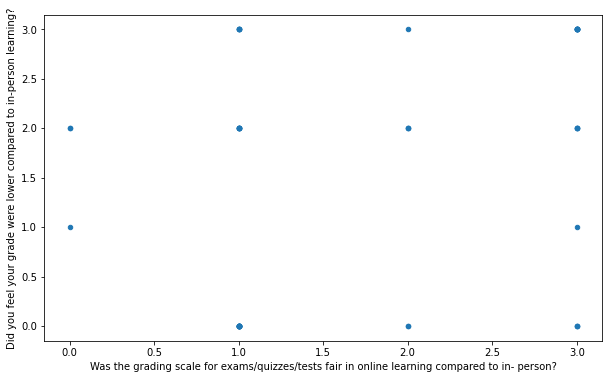

In [1040]:


Analysis2Copy.plot.scatter(x = 'Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?', y = 'Did you feel your grade were lower compared to in-person learning?')
plt.show()

In [1041]:
# Building the model with 5 clusters 
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=10, init = "Cao", n_init = 10, verbose=1)
clusters = kmode.fit_predict(Analysis2)

Analysis2.insert(0, "Cluster", clusters, True)
Analysis2

temp = Analysis2.groupby('Cluster')
temp.count()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2.0


,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
Cluster,,
0,12,12
1,5,5
2,1,1
3,7,7
4,5,5
5,3,3
6,9,9
7,2,2
8,3,3


In [1042]:
Analysis2[Analysis2['Cluster']== 0].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
4,0,Similar to in-person,Grades were similar to in-person learning
7,0,Similar to in-person,Grades were similar to in-person learning
8,0,Similar to in-person,Grades were similar to in-person learning
13,0,Similar to in-person,Grades were similar to in-person learning
14,0,Similar to in-person,Grades were similar to in-person learning
21,0,Similar to in-person,Grades were similar to in-person learning
25,0,Similar to in-person,Grades were similar to in-person learning
29,0,Similar to in-person,Grades were similar to in-person learning
43,0,Similar to in-person,Grades were similar to in-person learning
46,0,Similar to in-person,Grades were similar to in-person learning


In [1043]:
Analysis2[Analysis2['Cluster']== 1].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
3,1,Too strict,No
10,1,Too strict,No
15,1,Too strict,No
34,1,Too strict,No
36,1,Too strict,NIL


In [1044]:
Analysis2[Analysis2['Cluster']== 2].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
9,2,Too Lenient,Yes


In [1045]:
Analysis2[Analysis2['Cluster']== 3].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
5,3,Similar to in-person,No
16,3,Similar to in-person,No
17,3,Similar to in-person,No
22,3,Similar to in-person,No
26,3,Similar to in-person,No
31,3,Similar to in-person,No
49,3,Similar to in-person,No


In [1046]:
Analysis2[Analysis2['Cluster']== 4].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
1,4,Similar to in-person,Yes
6,4,Similar to in-person,Yes
11,4,Similar to in-person,Yes
20,4,Similar to in-person,Yes
24,4,Similar to in-person,Yes


In [1047]:
Analysis2[Analysis2['Cluster']== 5].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
0,5,Too strict,Grades were similar to in-person learning
23,5,Too strict,Grades were similar to in-person learning
39,5,Too strict,Grades were similar to in-person learning


In [1048]:
Analysis2[Analysis2['Cluster']== 6].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
2,6,Too strict,Yes
18,6,Too strict,Yes
28,6,Too strict,Yes
32,6,Too strict,Yes
35,6,Too strict,Yes
37,6,Too strict,Yes
40,6,Too strict,Yes
42,6,Too strict,Yes
44,6,Too strict,Yes


In [1049]:
Analysis2[Analysis2['Cluster']== 7].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
19,7,Too Lenient,Grades were similar to in-person learning
33,7,Too Lenient,Grades were similar to in-person learning


In [1050]:
Analysis2[Analysis2['Cluster']== 8].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
27,8,Too Lenient,No
38,8,Too Lenient,No
41,8,Too Lenient,No


In [1051]:
Analysis2[Analysis2['Cluster']== 9].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
12,9,NIL,NIL
30,9,NIL,No
45,9,NIL,No
